In [1]:
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)
import random
from  keras.preprocessing.image import save_img
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import io
import os
import yaml
from Util import *
from AdversarialAttack import *
from IPython import display
%matplotlib inline


Using TensorFlow backend.
2022-01-14 12:16:41.664482: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-01-14 12:16:41.733155: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-14 12:16:41.733560: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.755GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-01-14 12:16:41.733609: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-14 12:16:41.734079: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 1 

ModuleNotFoundError: No module named 'AdversarialAttack'

In [2]:
#Global configuration
attackMode = 'Raw' #Raw: means without defense, Detection: With adversarial exmaples detection
queryBudgets = 500 #Query Budgets
NumberOfTest = 100 #Number of test images
random.seed(42) #Set random seeds

2022-01-14 12:17:00.961643: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-01-14 12:17:01.104427: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2022-01-14 12:17:01.820279: W tensorflow/stream_executor/gpu/redzone_allocator.cc:312] Not found: ./bin/ptxas not found
Relying on driver to perform ptx compilation. This message will be only logged once.


6: 0.9942889
2: 0.0026954121
4: 0.0018765273
3: 0.0010828591
5: 5.5464036e-05
9: 4.4001203e-07


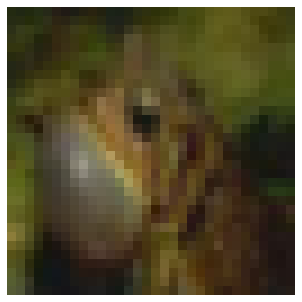

In [3]:
#Prepare test images
File,ImgPre = ResultSave('RayS-l2','./CIFAR')#Result saving folder and filename
ImgSet=[]
if os.path.isfile(File):
    HISTORY = LOAD(File)#Load Checkpoint
else:
    HISTORY = []
StartPoint=len(HISTORY)
for i in range(NumberOfTest):
    ImgSet.append(randomimg(mode=attackMode))
display_images(ImgSet[-1].img)


In [4]:
from RayS import RayS

In [5]:
#Run the experiments
constraint = np.inf#norm: 2; np.inf
for i in range(len(HISTORY),NumberOfTest):
    print("round "+str(i),end=': ')
    image = ImgSet[i]
    if i<StartPoint:
        continue
    with tf.device('/GPU:0'): 
        attack = RayS(image,order=2, epsilon=0.3, early_stopping=False)
        timehistory,adversarial=attack.attack_hard_label(query_limit=queryBudgets)
    if not adversarial is None:
        np.save(ImgPre+str(i),adversarial)
    print('Attack result: L2:{0}, Linf:{1}'.format(image.maxl2,image.maxlinf))
    History=[image.historyl2,image.historylinf,timehistory]
    HISTORY.append(History)
    SAVE(File,HISTORY)
        

round 0: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:3.37982177734375, Linf:0.061131954193115234
round 1: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.734257698059082, Linf:0.03149837255477905
round 2: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:3.0162179470062256, Linf:0.054460227489471436
round 3: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.143389105796814, Linf:0.020759165287017822
round 4: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:3.2195212841033936, Linf:0.05808725953102112
round 5: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.1620055437088013, Linf:0.020970910787582397
round 6: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:3.1704599857330322, Linf:0.05721771717071533
round 7: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.9366532564163208, Linf:0.016913115978240967
round 8: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:3.2583346366882324, Linf:0.058807045221328735
round 9: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.34083092212677, Linf:0.024334818124771118
round 10: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.25708478689193726, Linf:0.004638403654098511
round 11: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.7212512493133545, Linf:0.031055152416229248
round 12: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.0507848262786865, Linf:0.03703254461288452
round 13: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.43729645013809204, Linf:0.007891148328781128
round 14: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.1409199237823486, Linf:0.038626909255981445
round 15: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.3559325933456421, Linf:0.006421834230422974
round 16: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:3.9668915271759033, Linf:0.07216888666152954
round 17: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.1584595441818237, Linf:0.020901978015899658
round 18: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:4.684611797332764, Linf:0.09631440043449402
round 19: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.2708332538604736, Linf:0.022947609424591064
round 20: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.2281157970428467, Linf:0.042665570974349976
round 21: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.1930924355983734, Linf:0.0034838318824768066
round 22: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:4.985939979553223, Linf:0.09007477760314941
round 23: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.05459000542759895, Linf:0.0009857416152954102
round 24: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.11298473179340363, Linf:0.002038508653640747
round 25: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.679827928543091, Linf:0.049878478050231934
round 26: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.1029256582260132, Linf:0.019958287477493286
round 27: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:3.0667953491210938, Linf:0.055376797914505005
round 28: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.230694055557251, Linf:0.0402466356754303
round 29: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:3.4337496757507324, Linf:0.06200379133224487
round 30: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.3679333031177521, Linf:0.006644695997238159
round 31: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:4.83737325668335, Linf:0.08896675705909729
round 32: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:4.432660102844238, Linf:0.08054134249687195
round 33: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.7474693059921265, Linf:0.013487458229064941
round 34: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.3443641662597656, Linf:0.024255305528640747
round 35: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.5585636496543884, Linf:0.010077714920043945
round 36: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:5.079732894897461, Linf:0.09893009066581726
round 37: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:7.482823848724365, Linf:0.1412431001663208
round 38: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.9702812433242798, Linf:0.01751399040222168
round 39: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:6.6106038093566895, Linf:0.12127754092216492
round 40: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:5.332543849945068, Linf:0.09931787848472595
round 41: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.079855442047119, Linf:0.037525177001953125
round 42: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.685150146484375, Linf:0.030403822660446167
round 43: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.6872596740722656, Linf:0.01239970326423645
round 44: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.24168717861175537, Linf:0.004362016916275024
round 45: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.4043903350830078, Linf:0.025361478328704834
round 46: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.2988998293876648, Linf:0.00539281964302063
round 47: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.8633823990821838, Linf:0.016746968030929565
round 48: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.4070844650268555, Linf:0.02551412582397461
round 49: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.532550573348999, Linf:0.04573369026184082
round 50: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.281446695327759, Linf:0.041565507650375366
round 51: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.8966542482376099, Linf:0.034417569637298584
round 52: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.407186985015869, Linf:0.04530233144760132
round 53: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.33182844519615173, Linf:0.005986928939819336
round 54: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.2238991260528564, Linf:0.040203750133514404
round 55: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.934888482093811, Linf:0.03490966558456421
round 56: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.5050217509269714, Linf:0.00911170244216919
round 57: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.0378849506378174, Linf:0.036767929792404175
round 58: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.43729645013809204, Linf:0.007891148328781128
round 59: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:4.5152668952941895, Linf:0.08973255753517151
round 60: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.112926483154297, Linf:0.03812184929847717
round 61: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.2326817512512207, Linf:0.041078925132751465
round 62: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.43899592757225037, Linf:0.007938623428344727
round 63: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.34137678146362305, Linf:0.0061592161655426025
round 64: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.1072853803634644, Linf:0.019977867603302002
round 65: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.138643741607666, Linf:0.038741350173950195
round 66: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.1803069114685059, Linf:0.021364569664001465
round 67: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.9173022508621216, Linf:0.03459236025810242
round 68: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.7308931946754456, Linf:0.013219624757766724
round 69: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.8377903699874878, Linf:0.015124768018722534
round 70: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.6936743259429932, Linf:0.030557632446289062
round 71: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.624065637588501, Linf:0.047343939542770386
round 72: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:5.700338363647461, Linf:0.11337819695472717
round 73: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.19249145686626434, Linf:0.0034729838371276855
round 74: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.7460691928863525, Linf:0.049673646688461304
round 75: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.7213462591171265, Linf:0.013014674186706543
round 76: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.12615475058555603, Linf:0.002276480197906494
round 77: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:3.1272196769714355, Linf:0.05993029475212097
round 78: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.261640787124634, Linf:0.04112556576728821
round 79: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.4729997515678406, Linf:0.008533954620361328
round 80: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.5651683807373047, Linf:0.04630640149116516
round 81: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.8286358714103699, Linf:0.015133589506149292
round 82: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:6.6956915855407715, Linf:0.12086638808250427
round 83: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:3.164424419403076, Linf:0.057166337966918945
round 84: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:3.1305315494537354, Linf:0.05759847164154053
round 85: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.6010944843292236, Linf:0.010845065116882324
round 86: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:5.935535430908203, Linf:0.10936221480369568
round 87: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.5320382118225098, Linf:0.009599149227142334
round 88: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:5.832437992095947, Linf:0.10736426711082458
round 89: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.9137070178985596, Linf:0.016489505767822266
round 90: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.113037347793579, Linf:0.03812384605407715
round 91: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:7.403596878051758, Linf:0.13557168841362
round 92: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:2.3175888061523438, Linf:0.0418144166469574
round 93: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.7411945462226868, Linf:0.013372808694839478
round 94: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.17653469741344452, Linf:0.003185093402862549
round 95: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.5078955888748169, Linf:0.009164750576019287
round 96: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.6936743259429932, Linf:0.030557632446289062
round 97: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:1.6015880107879639, Linf:0.029349088668823242
round 98: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.017366750165820122, Linf:0.0003133416175842285
round 99: 

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:0.6085590720176697, Linf:0.010979771614074707


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/iar/anaconda3/envs/BO/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth
(155, 2)
85
1.7074627876281738
0.030806392431259155


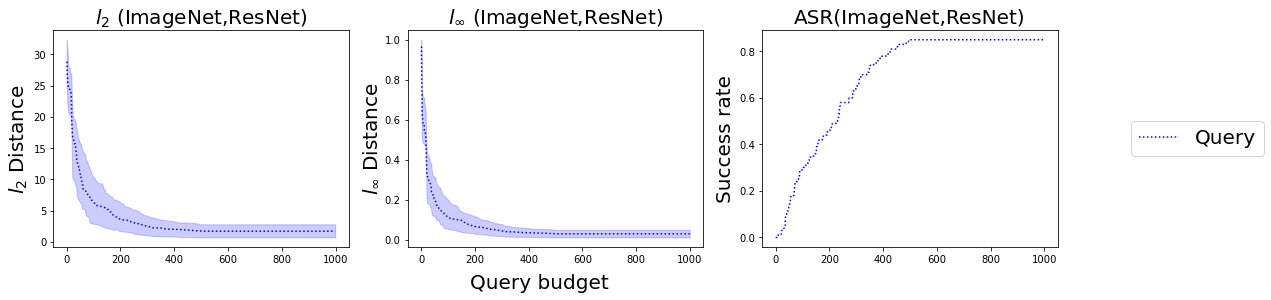

In [6]:
#Preview the results
from Visualization import Result
Valid=100
fontsize=20
vis = Result(filename = File,pref=ImgPre,color='b',label="Query",marker=None,linestyle=":")
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(18,4))

vis.Plot(0,Valid,1000,ax1)
ax1.set_title('$l_2$ (ImageNet,ResNet)',size=fontsize)
ax1.set_ylabel('$l_2$ Distance',size=fontsize)


vis.Plot(1,Valid,1000,ax2)
ax2.set_title('$l_\infty$ (ImageNet,ResNet)',size=fontsize)
ax2.set_ylabel('$l_\infty$ Distance',size=fontsize)

infT = 16.01/255

vis.ASR(1,Valid,1000,infT,ax3)


ax3.set_title('ASR(ImageNet,ResNet)',size=fontsize)
ax3.set_ylabel('Success rate',size=fontsize)



fig.text(0.5, -0.00, 'Query budget', ha='center', va='center',fontsize=fontsize)

handles, labels = ax3.get_legend_handles_labels()

plt.legend(handles=handles,labels=labels,fontsize=fontsize,bbox_to_anchor=(1.7,0.5 ), loc=7, borderaxespad=0.)

In [7]:
print(File)

./Result/InceptionD/RayS.dat
